In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score
)

In [2]:
data = pd.read_csv("breast-cancer.csv")

In [3]:
print("Dataset Shape:", data.shape)
print("\nFirst 5 rows:\n", data.head())


Dataset Shape: (569, 32)

First 5 rows:
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst 

In [4]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [6]:
# Assuming 'diagnosis' column is target (Malignant/Benign)
target_col = 'diagnosis'
X = data.drop(columns=[target_col])
y = data[target_col]

In [7]:
# Encode target if categorical
if y.dtype == 'O':
    y = y.map({'M':1, 'B':0})  # Malignant=1, Benign=0

print("Classes:", np.unique(y))


Classes: [0 1]


In [9]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
#  Cross-Validation for both kernels
linear_scores = cross_val_score(SVC(kernel='linear', C=1), X_train_scaled, y_train, cv=5)
rbf_scores = cross_val_score(SVC(kernel='rbf', C=1, gamma='scale'), X_train_scaled, y_train, cv=5)

print("Linear SVM CV Accuracy:", linear_scores.mean())
print("RBF SVM CV Accuracy:", rbf_scores.mean())

Linear SVM CV Accuracy: 0.9604395604395604
RBF SVM CV Accuracy: 0.9736263736263737



Linear SVM Results:
Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9047619047619048
F1 Score: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



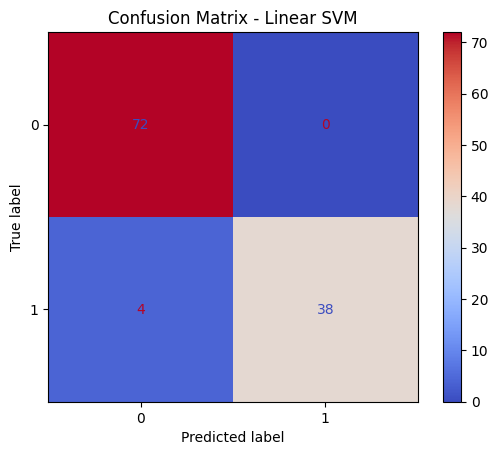


RBF SVM Results:
Accuracy: 0.9649122807017544
Precision: 0.975
Recall: 0.9285714285714286
F1 Score: 0.9512195121951219

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



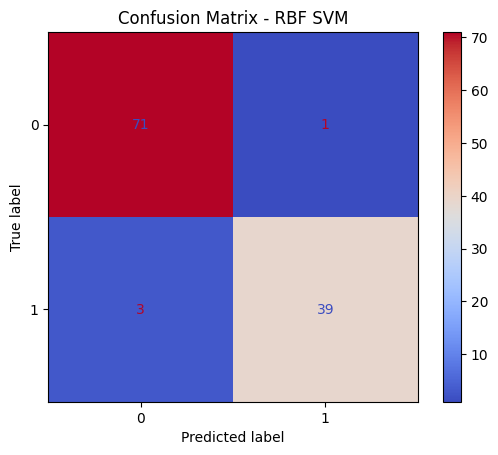


Polynomial SVM Results:
Accuracy: 0.8771929824561403
Precision: 1.0
Recall: 0.6666666666666666
F1 Score: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        72
           1       1.00      0.67      0.80        42

    accuracy                           0.88       114
   macro avg       0.92      0.83      0.86       114
weighted avg       0.90      0.88      0.87       114



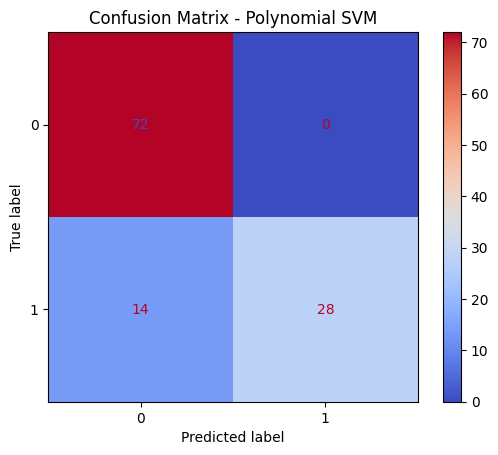

In [24]:
# ##  Train SVM Models with Different Kernels

# %% [code]
kernels = {
    "Linear": SVC(kernel='linear', C=1, random_state=42),
    "RBF": SVC(kernel='rbf', C=1, gamma='scale', random_state=42),
    "Polynomial": SVC(kernel='poly', degree=3, C=1, gamma='scale', random_state=42)
}

results = {}

for name, model in kernels.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results[name] = [acc, prec, rec, f1]
    
    print(f"\n{name} SVM Results:")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Recall:", rec)
    print("F1 Score:", f1)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="coolwarm")
    plt.title(f"Confusion Matrix - {name} SVM")
    plt.show()

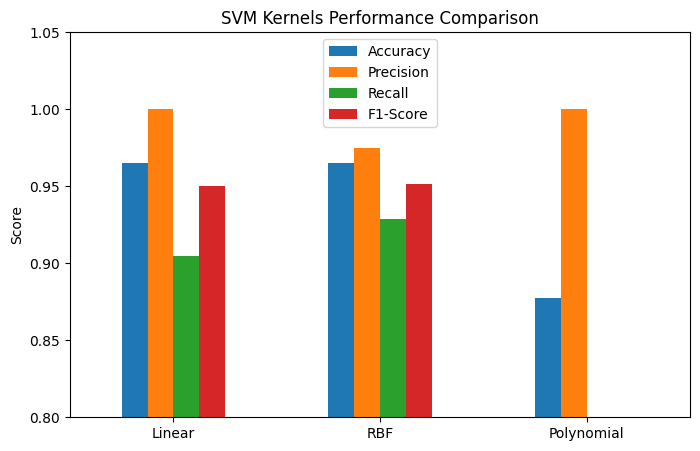

In [25]:
# %% [markdown]
# ##  Compare Model Performance (Bar Graph)

# %% [code]
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])
metrics_df.T.plot(kind="bar", figsize=(8,5))
plt.title("SVM Kernels Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.05)
plt.xticks(rotation=0)
plt.show()

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9736263736263737
Test Accuracy with Best Params: 0.9649122807017544


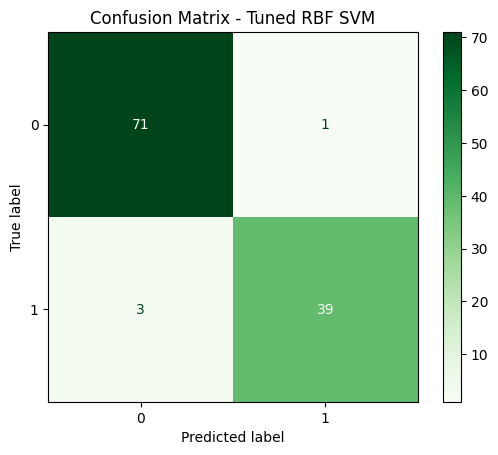

In [26]:
# ##  Hyperparameter Tuning for RBF Kernel
# Let's find the best **C** and **gamma** values.

# %% [code]
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale'],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("Test Accuracy with Best Params:", accuracy_score(y_test, y_pred_best))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_best)).plot(cmap="Greens")
plt.title("Confusion Matrix - Tuned RBF SVM")
plt.show()


Linear SVM CV Mean Accuracy: 0.9604395604395604
RBF SVM CV Mean Accuracy: 0.9736263736263737


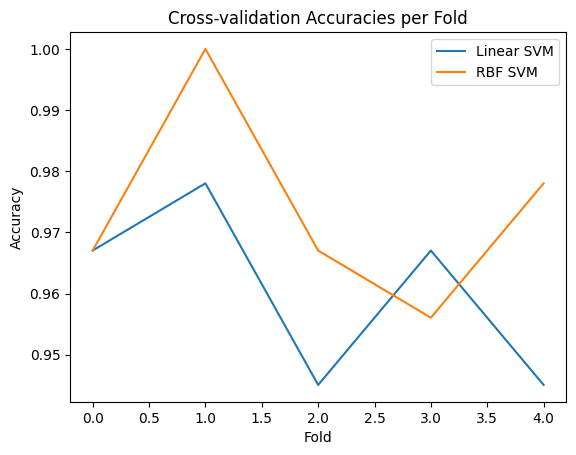

In [27]:
# ## Cross-validation Scores

# %% [code]
linear_scores = cross_val_score(SVC(kernel='linear', C=1), X_train_scaled, y_train, cv=5)
rbf_scores = cross_val_score(SVC(kernel='rbf', C=1, gamma='scale'), X_train_scaled, y_train, cv=5)

print("Linear SVM CV Mean Accuracy:", linear_scores.mean())
print("RBF SVM CV Mean Accuracy:", rbf_scores.mean())

plt.plot(linear_scores, label="Linear SVM")
plt.plot(rbf_scores, label="RBF SVM")
plt.title("Cross-validation Accuracies per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

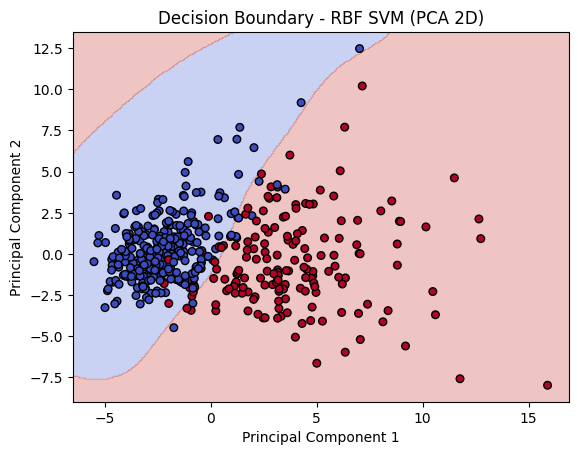

In [28]:
# ##  Decision Boundary Visualization (PCA 2D Projection)
# We reduce high-dimensional data into 2 principal components for visualization.

# %% [code]
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_2d = SVC(kernel='rbf', C=1, gamma='scale')
svm_2d.fit(X_train_pca, y_train)

# Create meshgrid
x_min, x_max = X_train_pca[:, 0].min()-1, X_train_pca[:, 0].max()+1
y_min, y_max = X_train_pca[:, 1].min()-1, X_train_pca[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, s=30, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Decision Boundary - RBF SVM (PCA 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()